In [188]:
import pyspark as ps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import time
import datetime
import numpy as np
import scipy.stats as stats
from math import isnan

In [2]:
spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('lecture')
         .getOrCreate()
        )
sc = spark.sparkContext

In [10]:
league = pd.read_csv('league-tables/result.csv')
league

,year,title,Team,A,D,F,GD,L,P,Pos,Pts,W
0,2016/2017,Premier League 2016-2017,Chelsea,33,3,85,52,5,38,1,93,30
1,2016/2017,Premier League 2016-2017,Tottenham Hotspurs,26,8,86,60,4,38,2,86,26
2,2016/2017,Premier League 2016-2017,Manchester City,39,9,80,41,6,38,3,78,23
3,2016/2017,Premier League 2016-2017,Liverpool,42,10,78,36,6,38,4,76,22
4,2016/2017,Premier League 2016-2017,Arsenal,44,6,77,33,9,38,5,75,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1888/1889,First Division 1888-89,Everton,46,2,35,-11,11,22,8,20,9
1339,1888/1889,First Division 1888-89,Burnley,62,3,42,-20,12,22,9,17,7
1340,1888/1889,First Division 1888-89,Derby County,60,2,41,-19,13,22,10,16,7
1341,1888/1889,First Division 1888-89,Notts County,73,2,39,-34,15,22,11,12,5


In [11]:
cols = ['year', 'Team', 'Pos', 'P', 'Pts', 'W', 'D', 'L', 'F', 'A', 'GD', 'title']
league = league[cols]

In [12]:
champs = league[league['Pos'] == 1]
champs

,year,Team,Pos,P,Pts,W,D,L,F,A,GD,title
0,2016/2017,Chelsea,1,38,93,30,3,5,85,33,52,Premier League 2016-2017
20,2014/2015,Chelsea,1,38,87,26,9,3,73,32,41,Barclaycard Premier League 2014-2015
40,2013/2014,Manchester City,1,38,86,27,5,6,102,37,65,Barclaycard Premier League 2013-2014
60,2012/2013,Manchester United,1,38,89,28,5,5,86,43,43,Barclaycard Premier League 2012-2013
80,2011/2012,Manchester City,1,38,89,28,5,5,93,29,64,Barclaycard Premier League 2011-2012
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1919/1920,West Bromwich Albion,1,42,60,28,4,10,104,47,57,1919/1920 First Division
1293,1891/1892,Sunderland,1,26,42,21,0,5,93,36,57,First Division 1891-92
1307,1890/1891,Everton,1,22,29,14,1,7,63,29,34,First Division 1890-91
1319,1889/1890,Preston North End,1,22,33,15,3,4,71,30,41,First Division 1889-90


In [13]:
league_data = league.drop(['year', 'title', 'Pos'], axis=1)
league_num = league_data.select_dtypes(include=[np.number])

In [14]:
league_38 = league_num[league['P'] == 38]
league_42 = league_num[league['P'] == 42]
league_40 = league_num[league['P'] == 40]
league_26 = league_num[league['P'] == 26]
league_22 = league_num[league['P'] == 22]

In [15]:
league_22['Pts']=league_22['Pts'] + league_22['W']
league_26['Pts']=league_26['Pts'] + league_22['W']
league_38['Pts']=(3*league_38['W']) + league_22['D']

norm_league_42 = league_42 * (38/42)
norm_league_40 = league_40 * (38/40)
norm_league_26 = league_26 * (38/26)
norm_league_22 = league_22 * (38/22)

norm_league = league_38.append(norm_league_42.append(norm_league_40.append(norm_league_26.append(norm_league_22))))

league_data[norm_league.columns] = norm_league
league_data['year'] = league['year']

league_data

/Users/kevinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kevinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kevinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,Team,P,Pts,W,D,L,F,A,GD,year
0,Chelsea,38.0,NaN,30.000000,3.000000,5.000000,85.000000,33.000000,52.000000,2016/2017
1,Tottenham Hotspurs,38.0,NaN,26.000000,8.000000,4.000000,86.000000,26.000000,60.000000,2016/2017
2,Manchester City,38.0,NaN,23.000000,9.000000,6.000000,80.000000,39.000000,41.000000,2016/2017
3,Liverpool,38.0,NaN,22.000000,10.000000,6.000000,78.000000,42.000000,36.000000,2016/2017
4,Arsenal,38.0,NaN,23.000000,6.000000,9.000000,77.000000,44.000000,33.000000,2016/2017
...,...,...,...,...,...,...,...,...,...,...
1338,Everton,38.0,50.090909,15.545455,3.454545,19.000000,60.454545,79.454545,-19.000000,1888/1889
1339,Burnley,38.0,41.454545,12.090909,5.181818,20.727273,72.545455,107.090909,-34.545455,1888/1889
1340,Derby County,38.0,39.727273,12.090909,3.454545,22.454545,70.818182,103.636364,-32.818182,1888/1889
1341,Notts County,38.0,29.363636,8.636364,3.454545,25.909091,67.363636,126.090909,-58.727273,1888/1889


In [16]:
champs_data = champs.drop(['year', 'title', 'Pos'], axis=1)
champs_num = champs_data.select_dtypes(include=[np.number])

champs_38 = champs_num[champs['P'] == 38]
champs_42 = champs_num[champs['P'] == 42]
champs_40 = champs_num[champs['P'] == 40]
champs_26 = champs_num[champs['P'] == 26]
champs_22 = champs_num[champs['P'] == 22]

champs_38['Pts']=(3*champs_38['W']) + champs_38['D']
champs_22['Pts']=champs_22['Pts'] + champs_22['W']
champs_26['Pts']=champs_26['Pts'] + champs_26['W']

norm_champs_42 = champs_42 * (38/42)
norm_champs_40 = champs_40 * (38/40)
norm_champs_26 = champs_26 * (38/26)
norm_champs_22 = champs_22 * (38/22)

norm_champs = champs_38.append(norm_champs_42.append(norm_champs_40.append(norm_champs_26.append(norm_champs_22))))

champs_data[norm_champs.columns] = norm_champs
champs_data['year'] = champs['year']
champs_data

/Users/kevinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kevinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/kevinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a c

,Team,P,Pts,W,D,L,F,A,GD,year
0,Chelsea,38.0,93.000000,30.000000,3.000000,5.000000,85.000000,33.000000,52.000000,2016/2017
20,Chelsea,38.0,87.000000,26.000000,9.000000,3.000000,73.000000,32.000000,41.000000,2014/2015
40,Manchester City,38.0,86.000000,27.000000,5.000000,6.000000,102.000000,37.000000,65.000000,2013/2014
60,Manchester United,38.0,89.000000,28.000000,5.000000,5.000000,86.000000,43.000000,43.000000,2012/2013
80,Manchester City,38.0,89.000000,28.000000,5.000000,5.000000,93.000000,29.000000,64.000000,2011/2012
...,...,...,...,...,...,...,...,...,...,...
1271,West Bromwich Albion,38.0,54.285714,25.333333,3.619048,9.047619,94.095238,42.523810,51.571429,1919/1920
1293,Sunderland,38.0,92.076923,30.692308,0.000000,7.307692,135.923077,52.615385,83.307692,1891/1892
1307,Everton,38.0,74.272727,24.181818,1.727273,12.090909,108.818182,50.090909,58.727273,1890/1891
1319,Preston North End,38.0,82.909091,25.909091,5.181818,6.909091,122.636364,51.818182,70.818182,1889/1890


In [68]:
league_data['Avg GD'] = league_data['GD']/league_data['P']

In [69]:
league_data['Pos'] = league['Pos']

In [71]:
league_data_pos = league_data[league_data['Avg GD'] > 0]


In [72]:
pos_avg = league_data_pos.groupby('Pos')['Avg GD'].mean()

In [73]:
season_avg = pos_avg.to_numpy()

In [110]:
def find_season_pvalue(year):
    ind_season = league_data_pos[league_data_pos['year']==year]
    ind_numpy = ind_season['Avg GD'].to_numpy()
    t, p = stats.ttest_ind(league_avg_numpy, ind_numpy, equal_var=False)
    return p

0.11644380217488157

In [117]:
years = list(league_data_pos.year.unique())

In [119]:
pvalues = []
for i in years:
    pvalues.append(find_season_pvalue(i))
    

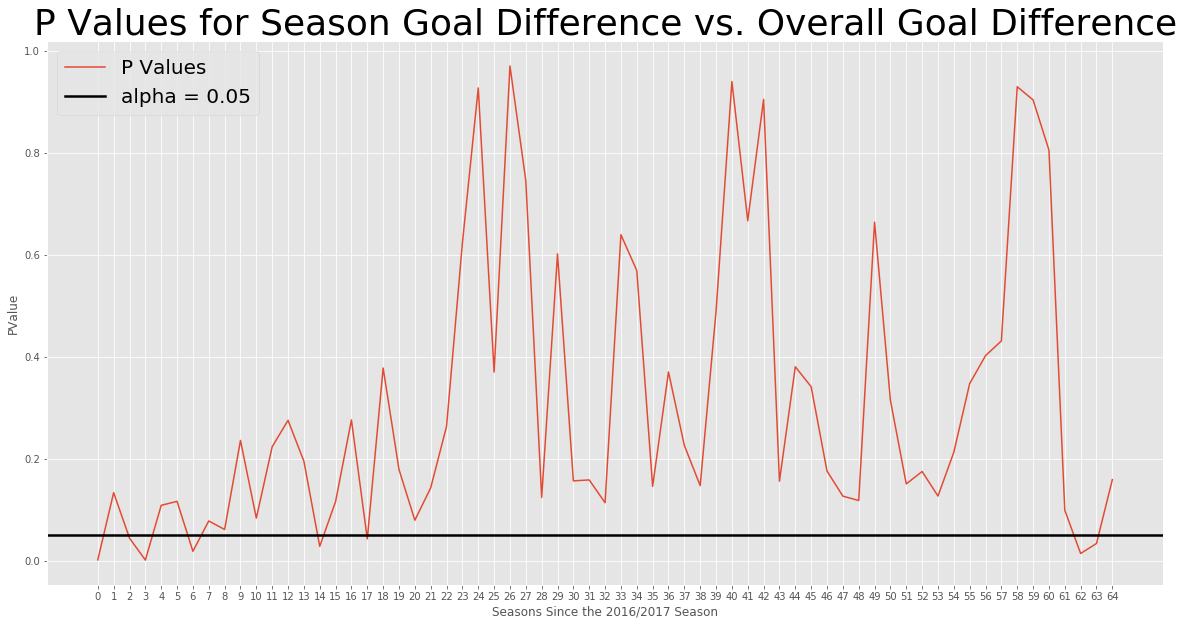

In [162]:
fig, ax = plt.subplots(figsize = [20,10])
ax.set_title('P Values for Season Goal Difference vs. Overall Goal Difference', fontsize = 36)
ax.plot(pvalues, label='P Values', linewidth=1.5)
plt.axhline(y=0.05, xmin=-1, xmax=66, c='black', label='alpha = 0.05', linewidth=2.5)
ax.set_xticks(np.arange(65))
ax.set_xlabel('Seasons Since the 2016/2017 Season')
ax.set_ylabel('PValue')
ax.legend(fontsize=20)

In [163]:
league_data

,Team,P,Pts,W,D,L,F,A,GD,year,Avg GD,Pos
0,Chelsea,38.0,NaN,30.000000,3.000000,5.000000,85.000000,33.000000,52.000000,2016/2017,1.368421,1
1,Tottenham Hotspurs,38.0,NaN,26.000000,8.000000,4.000000,86.000000,26.000000,60.000000,2016/2017,1.578947,2
2,Manchester City,38.0,NaN,23.000000,9.000000,6.000000,80.000000,39.000000,41.000000,2016/2017,1.078947,3
3,Liverpool,38.0,NaN,22.000000,10.000000,6.000000,78.000000,42.000000,36.000000,2016/2017,0.947368,4
4,Arsenal,38.0,NaN,23.000000,6.000000,9.000000,77.000000,44.000000,33.000000,2016/2017,0.868421,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1338,Everton,38.0,50.090909,15.545455,3.454545,19.000000,60.454545,79.454545,-19.000000,1888/1889,-0.500000,8
1339,Burnley,38.0,41.454545,12.090909,5.181818,20.727273,72.545455,107.090909,-34.545455,1888/1889,-0.909091,9
1340,Derby County,38.0,39.727273,12.090909,3.454545,22.454545,70.818182,103.636364,-32.818182,1888/1889,-0.863636,10
1341,Notts County,38.0,29.363636,8.636364,3.454545,25.909091,67.363636,126.090909,-58.727273,1888/1889,-1.545455,11


NameError: name 'team' is not defined

In [175]:
def team_values(team):
    team_table = league_data[league_data['Team'] == team]
    team_gd = team_table['Avg GD']
    team_numpy = team_gd.to_numpy()
    return team_gd

In [177]:
def team_champs(team):
    team_table = league_data[league_data['Team'] == team]
    team_champ = team_table[team_table['Pos'] == 1]
    team_season_gd = team_champ['Avg GD']
    champs_numpy = team_season_gd.to_numpy()
    return champs_numpy

In [183]:
def find_team_pvalue(team):
    team_table = league_data[league_data['Team'] == team]
    team_champ = team_table[team_table['Pos'] == 1]
    team_season_gd = team_champ['Avg GD']
    champs_numpy = team_season_gd.to_numpy()
    t, p = stats.ttest_ind(champs_numpy, team_values(team), equal_var=False)
    return p

In [181]:
champions = list(champs.Team.unique())

In [190]:
new_values = {}
for i in champions:
    new_values[i] = find_team_pvalue(i)
    
new_values = {k: new_values[k] for k in new_values if not isnan(new_values[k])}

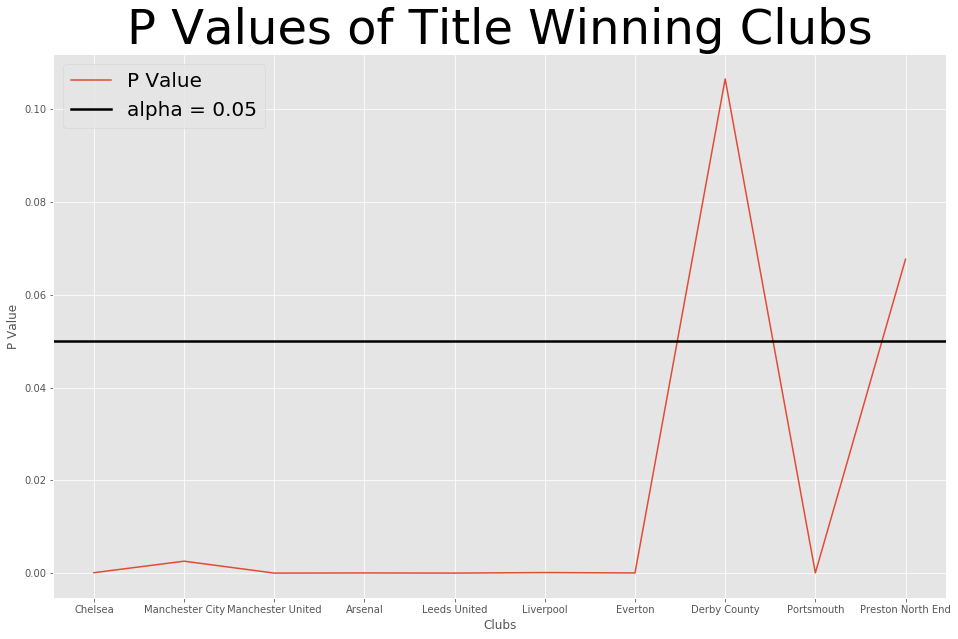

In [205]:
fig, ax = plt.subplots(figsize=[16,10])
plt.plot(*zip(*new_values.items()), label = 'P Value')
plt.axhline(y=0.05, xmin=-1, xmax=11, c='black', label='alpha = 0.05', linewidth=2.5)
ax.set_title('P Values of Title Winning Clubs', fontsize=48)
ax.set_xlabel('Clubs')
ax.set_ylabel('P Value')
ax.legend(fontsize=20)
plt.show()